# AIR BnB

### Data Understanding and feature creation (Task 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv(r"D:\Capstone Project\AirBnb_ABADS-20240316T083308Z-001 (1)\AirBnb_ABADS\calendar.csv")

In [3]:
calendar.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [5]:
calendar[["date",]] = calendar["date"].str.split(',', expand=True)
calendar.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [6]:
calendar.drop(columns=["date"],inplace = True)
calendar.head()

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,0,56.0,56.0,3,5
1,2,22742449,1,95.0,95.0,2,99
2,3,34621717,0,75.0,75.0,2,1125
3,4,38281744,1,150.0,150.0,1,1000
4,5,18835003,0,100.0,100.0,2,1125


In [7]:
hosts = pd.read_csv(r"D:\Capstone Project\AirBnb_ABADS-20240316T083308Z-001 (1)\AirBnb_ABADS\hosts.csv")

In [8]:
hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [9]:
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [10]:
listings = pd.read_csv(r"D:\Capstone Project\AirBnb_ABADS-20240316T083308Z-001 (1)\AirBnb_ABADS\listings.csv")

In [11]:
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [13]:
reviews = pd.read_csv(r"D:\Capstone Project\AirBnb_ABADS-20240316T083308Z-001 (1)\AirBnb_ABADS\reviews.csv")

In [14]:
reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62922 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [16]:
missing_values = calendar.isnull().sum()
print(missing_values)

calender_id        0
listing_id         0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
dtype: int64


#### For Numerical Columns I have used median for replacement

In [17]:
calendar['price'].fillna(calendar['price'].median(), inplace=True)

In [18]:
calendar.isnull().sum()

calender_id        0
listing_id         0
available          0
price              0
adjusted_price    75
minimum_nights     0
maximum_nights     0
dtype: int64

In [19]:
calendar['adjusted_price'].fillna(calendar['adjusted_price'].median(), inplace=True)

In [20]:
calendar.isnull().sum()

calender_id       0
listing_id        0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [21]:
calendar.describe()

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,319192.000000,3.191920e+05,319192.000000,319192.000000,319192.000000,319192.000000,319192.000000
mean,159596.500000,3.488528e+07,0.535192,109.910515,109.704914,5.379395,812.206102
std,92142.937899,1.523257e+07,0.498761,185.769943,185.530648,21.456127,511.622075
min,1.000000,5.090400e+04,0.000000,13.000000,13.000000,1.000000,1.000000
25%,79798.750000,2.338661e+07,0.000000,59.000000,58.000000,1.000000,365.000000
50%,159596.500000,3.891969e+07,1.000000,79.000000,79.000000,2.000000,1125.000000
75%,239394.250000,4.839174e+07,1.000000,115.000000,115.000000,3.000000,1125.000000
max,319192.000000,5.398332e+07,1.000000,5800.000000,5800.000000,500.000000,9999.000000


In [22]:
calendar=calendar.drop_duplicates()
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,0,56.0,56.0,3,5
1,2,22742449,1,95.0,95.0,2,99
2,3,34621717,0,75.0,75.0,2,1125
3,4,38281744,1,150.0,150.0,1,1000
4,5,18835003,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10
319188,319189,36953202,0,140.0,140.0,3,1125
319189,319190,39580214,1,49.0,49.0,1,13
319190,319191,49016014,0,60.0,60.0,2,30


In [23]:
missing_values = hosts.isnull().sum()
print(missing_values)

host_id            0
host_name          0
host_since         0
host_location      3
host_about       621
dtype: int64


#### For categorical columns, you might use mode or a specific value for replacement

In [24]:
hosts['host_about'].fillna('Unknown', inplace=True)

In [25]:
hosts.isnull().sum()

host_id          0
host_name        0
host_since       0
host_location    3
host_about       0
dtype: int64

In [26]:
hosts['host_location'].fillna('Unknown', inplace=True)

In [27]:
hosts.isnull().sum()

host_id          0
host_name        0
host_since       0
host_location    0
host_about       0
dtype: int64

In [28]:
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1111 non-null   object
 4   host_about     1111 non-null   object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [29]:
missing_values = listings.isnull().sum()
print(missing_values)

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64


#### For Numerical Columns I have used median for replacement

In [30]:
listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)

In [31]:
listings.isnull().sum()

listing_id         0
listing_url        0
name               0
description       70
latitude           0
longitude          0
property_type      0
room_type          0
accomodates        0
bathrooms_text     0
bedrooms           0
beds              41
amenities          0
host_id            0
dtype: int64

#### For categorical columns, I have used mode or a specific value for replacement

In [32]:
listings['beds'].fillna(listings['beds'].median(), inplace=True)
listings.isnull().sum()

listing_id         0
listing_url        0
name               0
description       70
latitude           0
longitude          0
property_type      0
room_type          0
accomodates        0
bathrooms_text     0
bedrooms           0
beds               0
amenities          0
host_id            0
dtype: int64

In [33]:
listings['description'].fillna('Unknown', inplace=True)
listings.isnull().sum()

listing_id        0
listing_url       0
name              0
description       0
latitude          0
longitude         0
property_type     0
room_type         0
accomodates       0
bathrooms_text    0
bedrooms          0
beds              0
amenities         0
host_id           0
dtype: int64

In [34]:
missing_values = reviews.isnull().sum()
print(missing_values)

review_id         0
listing_id        0
date              0
reviewer_id       0
reviewer_name     0
comments         65
dtype: int64


In [35]:
reviews['comments'].fillna('Unknown', inplace=True)

In [36]:
reviews.isnull().sum()

review_id        0
listing_id       0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [37]:
reviews.drop(columns=["date"],inplace = True)

In [38]:
reviews.head()

,review_id,listing_id,reviewer_id,reviewer_name,comments
0,1,50904,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,7984251,Marcel,This is a very nice appartement. We really lik...


In [39]:
cont=calendar.select_dtypes(include=np.number)

In [40]:
cont.columns

Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# List of continuous variable names
cont = ['price', 'adjusted_price']

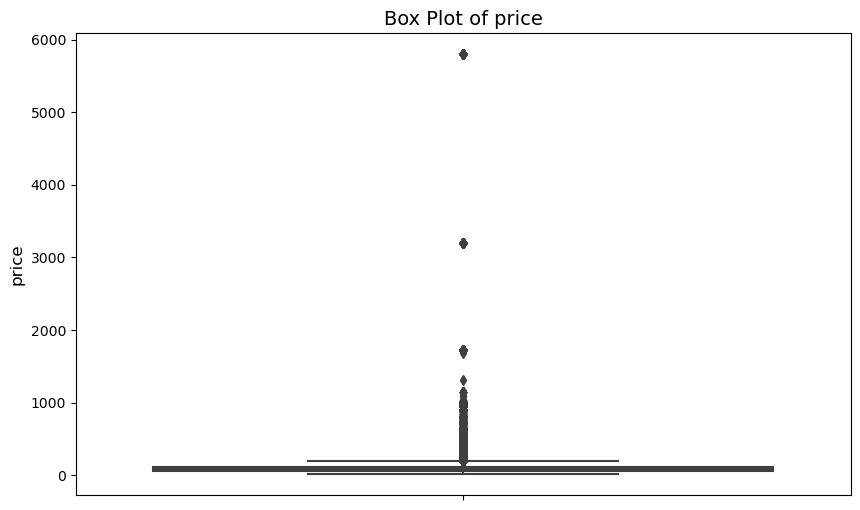

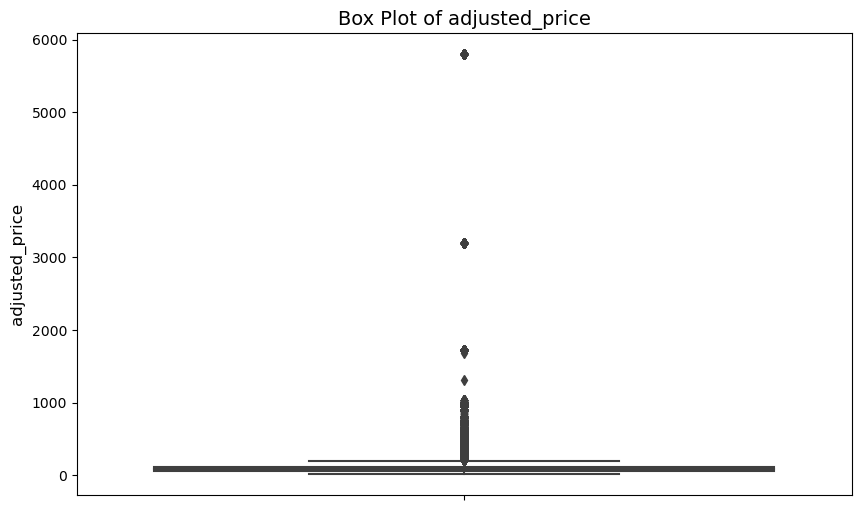

In [43]:
# Loop through each variable and create box plots
for var in cont:
    plt.figure(figsize=(10, 6)) # Set figure size 
    sns.boxplot(y=var, data=calendar) # Create box plot 
    plt.title(f'Box Plot of {var}', fontsize=14) # Add title 
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel(var, fontsize=12)  # Add y-axis label
    plt.show()  # Display plot

###### This creates box plots for each continuous variable in the calendar dataset. Each box plot visualizes the distribution of a specific continuous variable, showing key statistics such as median, quartiles, and outliers. This helps in understanding the spread and central tendency of the data for each variable.

In [44]:
def remove_outliers(calendar, column):
    Q1 = calendar[column].quantile(0.25)
    Q3 = calendar[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where the values are within the bounds
    calendar_filtered = calendar[(calendar[column] >= lower_bound) & (calendar[column] <= upper_bound)]
    
    return calendar_filtered

In [45]:
calendar_cleaned = remove_outliers(calendar, 'price')

In [46]:
calendar.dtypes

calender_id         int64
listing_id          int64
available           int64
price             float64
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

In [47]:
from scipy.stats import skew

# calculating the skewness of the price
price_skewness = skew(calendar['price'])

print("Skewness of price:", price_skewness)


Skewness of price: 19.173548533397906


#### Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution

#### Data Quality and checks (Task 1)

#### Analyze Listings, Hosts, and Reviews tables to identify potential transformations

In [48]:
# Perform descriptive statistics to understand the distribution of numerical columns
print("\nListings Descriptive Statistics:")
print(listings.describe())
print("\nHosts Descriptive Statistics:")
print(hosts.describe())
print("\nReviews Descriptive Statistics:")
print(reviews.describe())


Listings Descriptive Statistics:
         listing_id     latitude    longitude  accomodates     bedrooms  \
count  1.749000e+03  1749.000000  1749.000000  1749.000000  1749.000000   
mean   3.485506e+07    51.214069     4.413165     3.761578     1.490566   
std    1.523689e+07     0.013740     0.019373     2.771378     1.059741   
min    5.090400e+04    51.160084     4.290770     1.000000     1.000000   
25%    2.337286e+07    51.207870     4.400240     2.000000     1.000000   
50%    3.889829e+07    51.216540     4.409460     3.000000     1.000000   
75%    4.838954e+07    51.220880     4.424660     4.000000     2.000000   
max    5.398332e+07    51.349400     4.483470    16.000000    20.000000   

              beds       host_id  
count  1749.000000  1.749000e+03  
mean      2.215552  1.417765e+08  
std       2.201484  1.286506e+08  
min       1.000000  2.340770e+05  
25%       1.000000  2.875771e+07  
50%       2.000000  1.033633e+08  
75%       3.000000  2.344842e+08  
max      4

In [49]:
# Check for unique values and value counts in categorical columns
print("\nListings Unique Values:")
for column in listings.select_dtypes(include='object').columns:
    print(f"{column}: {listings[column].unique()}")


Listings Unique Values:
listing_url: ['https://www.airbnb.com/rooms/50904'
 'https://www.airbnb.com/rooms/116134'
 'https://www.airbnb.com/rooms/218916' ...
 'https://www.airbnb.com/rooms/53929354'
 'https://www.airbnb.com/rooms/53949105'
 'https://www.airbnb.com/rooms/53983318']
name: ['aplace/antwerp: cosy suite - fashion district'
 'Spacious apartment nearby Mas'
 'Apartment with terrace in trendy Zurenborg' ...
 'Mooi appartement met open haard'
 'Kasteel Boterlaerhof vlakbij Antwerpen'
 'Infinite luxury stay in the heart of Antwerp']
description: ['Decorated in a vintage style combined with a few new objects which quarantees you a warm and cosy room.<br /><br /><b>The space</b><br />Aplace Antwerp is located on a charming little square in the very center of Antwerp (fashion district area). Literally around the corner of everything you want to see in this beautifull city.<br /><br />This suite has been completely renovated since december 2012. It is being decorated in a vintage st

In [50]:
print("\nHosts Unique Values:")
for column in hosts.select_dtypes(include='object').columns:
    print(f"{column}: {hosts[column].unique()}")


Hosts Unique Values:
host_name: ['Karin' 'Ann' 'Valérie' 'Tatiana' 'Els' 'Julie' 'Patricia' 'Paul'
 'Katelijne' 'Jonas' 'Ione' 'Guy' 'Laura' 'Lenny' 'Kat' 'Geert' 'Kristien'
 'Lily' 'Carmina' 'Stefan' 'Matthias' 'Loïc' 'Sachli' 'Marc & Elizabeth'
 'Marleen' 'Fronk & Lieve' 'Roos' 'Sue' 'Folker' 'Linda' 'Pieter'
 'Eveline' 'Chris' 'Stijn' 'Ahome' 'Sarah' 'Tom & Carla' 'Christophe'
 'Ariane' 'Yuri' 'Hannes' 'Deborah' 'Saskia' 'Wouter' 'Annemie' 'Cathy'
 'Alexandra' 'Bart' 'Tim' 'Jan' 'Peter' 'Mimo' 'Erwin' 'Arthur' 'Daisy'
 'Kristof' 'Kathleen' 'Anke' 'Son' 'Timur' 'Yves' 'Lies' 'Rayes' 'Sofie'
 'Marie' 'Zuzanna' 'Johan' 'Caroline & Klaas' 'Loes' 'Tommie'
 'Debora - Jo' 'Morgan' 'Sanne' 'Snezhana' 'Magali' 'Héloïse'
 'Sanne En Ward' 'Irina' 'Anne' 'Jeremy' 'Joris' 'Eva' 'Frank Frédéric'
 'Nele' 'Paolo' 'Catherine' 'Evert' 'Christof' 'Shray' 'Ben' 'Joni' 'Sven'
 'Marieke' 'Ian, Jande En Marie' 'Kwinten' 'Patricia En Maarten' 'Sean'
 'Hanne' 'Melissa' 'Niomi' 'Tania' 'Riet' 'David' 'Mark'

In [51]:
print("\nReviews Unique Values:")
for column in reviews.select_dtypes(include='object').columns:
    print(f"{column}: {reviews[column].unique()}")


Reviews Unique Values:
reviewer_name: ['Jihae' 'Emilie' 'Aurélien' ... 'James Sawyer' 'Soufyan' 'Dániel']
comments: ['Karin’s “Aplace” is absolutely beautiful and cozy boutique hotel in the center of Antwerp. The Host, Karin is an amazing, warm and kind person who truly puts her hearts and soul into making her guests feel like at home. The apartment is beautifully furnished with mix of retro and modern style - I was so amazed about all of elegant details. The place is very close to almost everything in Antwerp. I highly recommend!'
 'Karin is a wonderful host, she was really helpful ! Highly recommended for a stay in Antwerp.'
 'Amazing flat, really close from the MAS Musem, and 15 minutes walking from the Cathedral. \r<br/>Really calm, many space and light, perfect for 2 couples, perfect for a weekend.\r<br/>Antwerpen is a really nice city to walk around and chill in cosy cafés.\r<br/>Check out the coolest places here: (Website hidden by Airbnb) \r<br/>'
 ...
 'The spacious apartment

###### This analysis helps us identify potential transformations that may be required, such as handling missing values, converting data types, encoding categorical variables, scaling numerical features, and extracting useful information from text fields. Based on the insights gained from this analysis

#### Determine predictors that can be used to predict the listing price.

In [53]:
import pandas as pd

# Load the data from CSV files
listings = pd.read_csv(r'D:\Capstone Project\AirBnb_ABADS-20240316T083308Z-001 (1)\AirBnb_ABADS\listings.csv')

In [54]:
# Display the first few rows of the listings table to understand its structure
print("Listings Table:")
print(listings.head())

Listings Table:
   listing_id                          listing_url  \
0       50904   https://www.airbnb.com/rooms/50904   
1      116134  https://www.airbnb.com/rooms/116134   
2      218916  https://www.airbnb.com/rooms/218916   
3      224333  https://www.airbnb.com/rooms/224333   
4      224682  https://www.airbnb.com/rooms/224682   

                                            name  \
0  aplace/antwerp: cosy suite - fashion district   
1                  Spacious apartment nearby Mas   
2     Apartment with terrace in trendy Zurenborg   
3     Large stylish room in 1930s house + garden   
4          APARTMENT ROSCAM - OLD CENTRE ANTWERP   

                                         description   latitude  longitude  \
0  Decorated in a vintage style combined with a f...  51.218575   4.398631   
1  Enjoy your stay at our 4 person apartment in t...  51.230510   4.405930   
2  Do you enjoy authentic places with a lot of ch...  51.206330   4.429420   
3  Large bedroom in classic 1930s 

In [55]:
# Check for missing values and data types in the listings table
print("\nListings Table Info:")
print(listings.info())


Listings Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB
None


In [56]:
# Perform descriptive statistics to understand the distribution of numerical columns
print("\nListings Descriptive Statistics:")
print(listings.describe())


Listings Descriptive Statistics:
         listing_id     latitude    longitude  accomodates     bedrooms  \
count  1.749000e+03  1749.000000  1749.000000  1749.000000  1621.000000   
mean   3.485506e+07    51.214069     4.413165     3.761578     1.529303   
std    1.523689e+07     0.013740     0.019373     2.771378     1.091453   
min    5.090400e+04    51.160084     4.290770     1.000000     1.000000   
25%    2.337286e+07    51.207870     4.400240     2.000000     1.000000   
50%    3.889829e+07    51.216540     4.409460     3.000000     1.000000   
75%    4.838954e+07    51.220880     4.424660     4.000000     2.000000   
max    5.398332e+07    51.349400     4.483470    16.000000    20.000000   

              beds       host_id  
count  1708.000000  1.749000e+03  
mean      2.220726  1.417765e+08  
std       2.227509  1.286506e+08  
min       1.000000  2.340770e+05  
25%       1.000000  2.875771e+07  
50%       2.000000  1.033633e+08  
75%       3.000000  2.344842e+08  
max      4

In [57]:
# Check for correlations between numerical columns in calendar and the listing price
numerical_columns = calendar.select_dtypes(include=['int', 'float']).columns
correlation_matrix = calendar[numerical_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix['price'].sort_values(ascending=False))



Correlation Matrix:
price             1.000000
adjusted_price    0.999181
maximum_nights    0.041567
listing_id        0.025568
available         0.019168
calender_id       0.000026
minimum_nights   -0.012973
Name: price, dtype: float64


In [58]:
# Interpret the correlation coefficients
print("Interpretation of Correlation Coefficients:")
print("1. The 'price' has a perfect positive correlation with 'adjusted_price', indicating a very strong positive linear relationship.")
print("2. The 'price' has a weak positive correlation with 'maximum_nights', suggesting a slight increase in price as the maximum number of nights a guest can book increases.")
print("3. The correlations with 'listing_id' and 'available' are very weak, indicating almost no linear relationship.")
print("4. The correlation with 'minimum_nights' is negligible, suggesting a very weak negative relationship, but it is close to zero.")


Interpretation of Correlation Coefficients:
1. The 'price' has a perfect positive correlation with 'adjusted_price', indicating a very strong positive linear relationship.
2. The 'price' has a weak positive correlation with 'maximum_nights', suggesting a slight increase in price as the maximum number of nights a guest can book increases.
3. The correlations with 'listing_id' and 'available' are very weak, indicating almost no linear relationship.
4. The correlation with 'minimum_nights' is negligible, suggesting a very weak negative relationship, but it is close to zero.


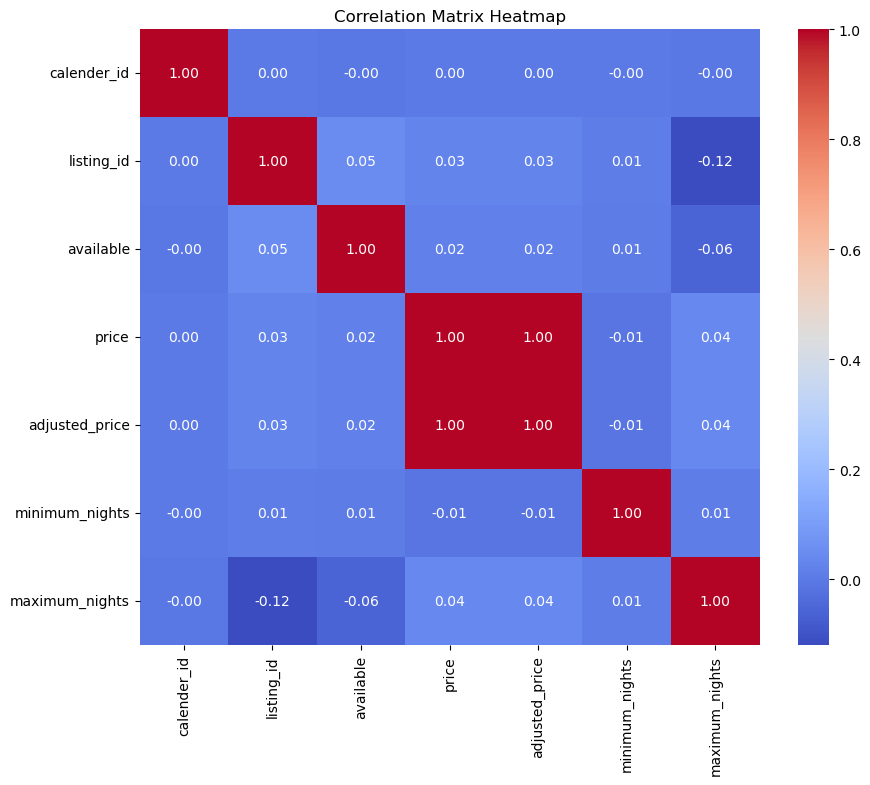

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")
plt.show()


###### The heatmap helps identify which variables are strongly correlated with each other, which can inform feature selection and modeling decisions. It also provides insights into potential multicollinearity issues, where highly correlated predictors may impact model performance

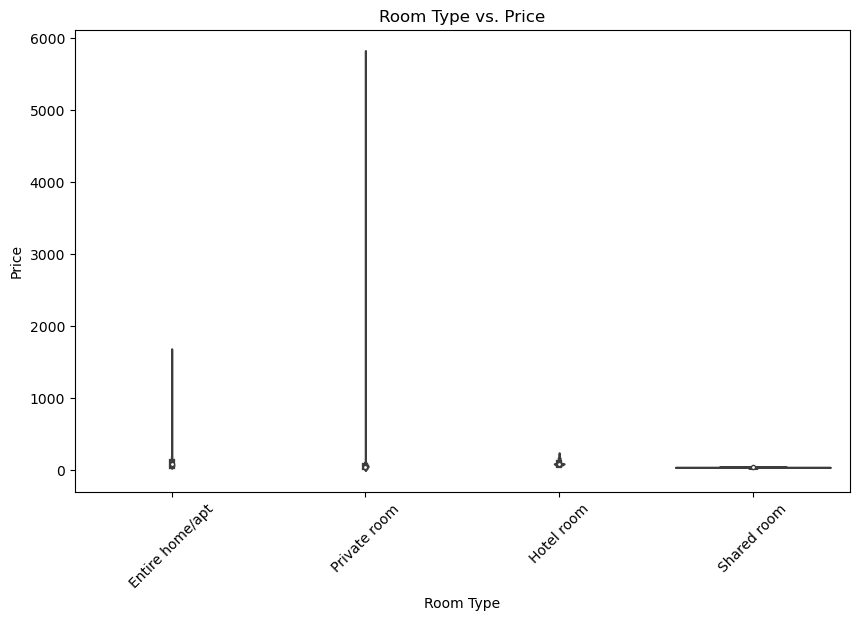

In [63]:
# Create a violin plot to explore the relationship between 'room_type' and 'price'
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=merged_df)
plt.title("Room Type vs. Price")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


###### The width of the violin at a particular point indicates the density of data points at that value and the shape of the violin helps visualize the distribution of prices for each room type

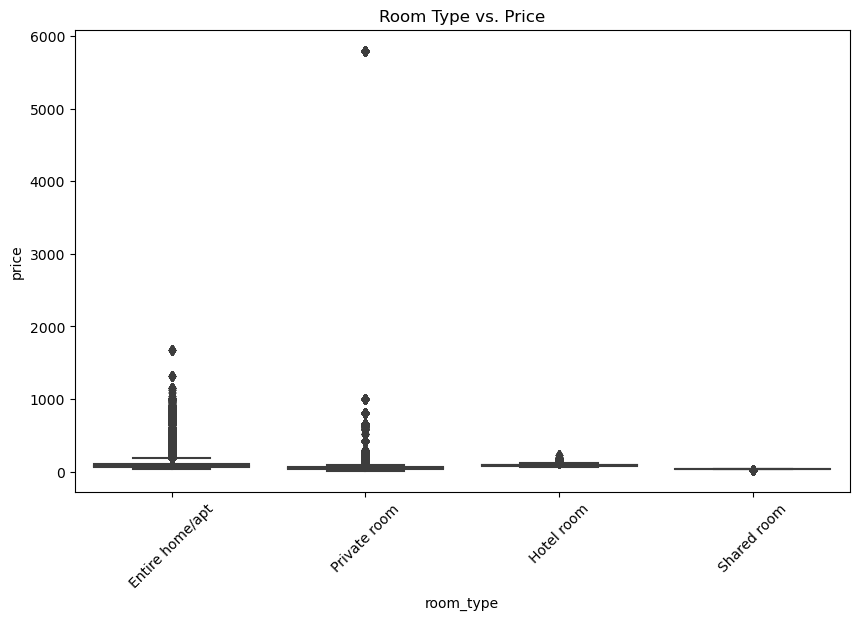

In [64]:
# Explore potential relationships between categorical variables and 'price'
# You can use boxplots or violin plots for visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=merged_df)
plt.title("Room Type vs. Price")
plt.xticks(rotation=45)
plt.show()

###### The boxplot helps identify any potential trends or patterns in pricing based on room type, which can inform pricing strategies or marketing decisions for property owners or rental platforms.

In [60]:
# Select features with correlation coefficient above a certain threshold (e.g., 0.1)
relevant_features = correlation_matrix[correlation_matrix['price'].abs() > 0.1].index.tolist()

# Display the selected features
print("Selected Relevant Features:")
print(relevant_features)

Selected Relevant Features:
['price', 'adjusted_price']


###### The selected features represent potential predictors that exhibit a strong correlation (either positive or negative) with the listing price. These features can be further explored and used in predictive modeling tasks to develop accurate pricing models for rental listings.

#### An Aggregated view of data spread across different tables

In [61]:
# Perform joins to merge data from different tables
merged_df = calendar.merge(listings, on='listing_id').merge(hosts, on='host_id').merge(reviews, on='listing_id')

In [65]:
# Aggregate the data
aggregated_df = merged_df.groupby('listing_id').agg({
    'available': 'mean',  # Example of aggregation for a predictor variable
    'price': 'mean'  # Example of aggregation for the target variable
    # Add more predictor variables here
})

In [66]:
# List of columns to drop
columns_to_drop = ['listing_id ', 'listing_url', 'name', 'description', 'latitude ', 'longitude', 'property_type', 'room_type', 'accomodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'host_name ', 'host_since', 'host_location', 'host_about', 'review_id', 'listing_id', 'reviewer_id', 'reviewer_name', 'comments']

# Drop the columns from the DataFrame
aggregated_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [86]:
# Optionally, you can rename columns for clarity
aggregated_df.rename(columns={'available': 'mean_available', 'price': 'mean_price'}, inplace=True)

In [69]:
# Display the aggregated data view
print(aggregated_df.head())

            mean_available  mean_price
listing_id                            
50904             0.725275  165.329670
116134            0.814634  150.000000
218916            0.000000   85.000000
224333            0.925926   16.000000
224682            0.852273   87.272727


###### This aggregated view now contains the mean values of predictor variables and the target variable (listing price) for each listing_id, which can be used for further analysis and modeling

In [84]:
aggregated_df.head()

,mean_available,mean_price
listing_id,,
50904,0.725275,165.329670
116134,0.814634,150.000000
218916,0.000000,85.000000
224333,0.925926,16.000000
224682,0.852273,87.272727


In [85]:
# Check the columns in aggregated_df
print("Columns in aggregated_df:")
print(aggregated_df.columns)


Columns in aggregated_df:
Index(['mean_available', 'mean_price'], dtype='object')


#### Data Quality and Checks (Task 1)

##### Data Audit

##### Create a data quality report with details on continuous and categorical variables

In [70]:
# Data Quality Report
def data_quality_report(merged_df):
    # Continuous Variables
    continuous_vars = merged_df.select_dtypes(include=['int', 'float'])
    continuous_report = continuous_vars.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95])

In [71]:
# Check if DataFrame has columns before describing
if not merged_df.empty and aggregated_df.columns.size > 0:
    # Categorical Variables
    categorical_vars = aggregated_df.select_dtypes(include=['object'])
    if not categorical_vars.empty:
        categorical_report = categorical_vars.describe()
        print("\nCategorical Variables Report:")
        print(categorical_report)
    else:
        print("DataFrame does not contain any categorical variables.")
else:
    print("DataFrame is empty or has no columns.")


DataFrame does not contain any categorical variables.


In [72]:
# Assuming you have a DataFrame named 'merged_df' containing continuous variables

# Compute statistics for continuous variables
continuous_report = merged_df.describe()

# Print Data Quality Report for Continuous Variables
print("\nData Quality Report:")
print("\nContinuous Variables:")
print(continuous_report)


Data Quality Report:

Continuous Variables:
        calender_id    listing_id     available         price  adjusted_price  \
count  1.146877e+07  1.146877e+07  1.146877e+07  1.146877e+07    1.146877e+07   
mean   1.594495e+05  2.279420e+07  5.443685e-01  9.095526e+01    9.075630e+01   
std    9.230433e+04  1.415612e+07  4.980276e-01  1.175212e+02    1.172211e+02   
min    1.000000e+00  5.090400e+04  0.000000e+00  1.400000e+01    1.400000e+01   
25%    7.955400e+04  1.001510e+07  0.000000e+00  5.500000e+01    5.500000e+01   
50%    1.590530e+05  2.165832e+07  1.000000e+00  7.000000e+01    7.000000e+01   
75%    2.394860e+05  3.390546e+07  1.000000e+00  9.900000e+01    9.900000e+01   
max    3.191920e+05  5.382519e+07  1.000000e+00  5.800000e+03    5.800000e+03   

       minimum_nights  maximum_nights      latitude     longitude  \
count    1.146877e+07    1.146877e+07  1.146877e+07  1.146877e+07   
mean     3.238779e+00    9.822816e+02  5.121678e+01  4.413001e+00   
std      8.370485e

In [73]:
# Generate Data Quality Report for merged_df
data_quality_report(merged_df)

###### This report helps in understanding the quality and characteristics of the data, identifying potential data anomalies or issues, and guiding further data preprocessing or analysis steps

#### Include information such as unique values, percentage of missing values, minimum, maximum, average, percentiles, etc.

In [74]:
# Step 1: Compute Statistics for Categorical Variables
unique_values = merged_df.select_dtypes(include=['object']).nunique()  # Count unique values
missing_values_percentage = (merged_df.isnull().mean() * 100).round(2)  # Calculate percentage of missing values

In [75]:
# Step 2: Assign Results to categorical_report
categorical_report = pd.DataFrame({
    'Unique Values': unique_values,
    'Missing Values (%)': missing_values_percentage
})

In [76]:
# Step 3: Print the Data Quality Report for Categorical Variables
print("\nData Quality Report for Categorical Variables:")
print(categorical_report)


Data Quality Report for Categorical Variables:
                Unique Values  Missing Values (%)
accomodates               NaN                0.00
adjusted_price            NaN                0.00
amenities              1453.0                0.00
available                 NaN                0.00
bathrooms_text           22.0                0.00
bedrooms                  NaN               10.31
beds                      NaN                0.85
calender_id               NaN                0.00
comments              61443.0                0.00
description            1367.0                1.07
host_about              464.0                0.00
host_id                   NaN                0.00
host_location           139.0                0.00
host_name               676.0                0.00
host_since              843.0                0.00
latitude                  NaN                0.00
listing_id                NaN                0.00
listing_url            1525.0                0.00
lo

###### Overall, this code segment helps in understanding the distribution and quality of categorical variables in the dataset, providing valuable insights for data preprocessing and analysis.

In [77]:
# Step 1: Identify Data Anomalies

# Identify outliers in numerical variables
numeric_columns = merged_df.select_dtypes(include=['int', 'float']).columns
Q1 = merged_df[numeric_columns].quantile(0.25)
Q3 = merged_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((merged_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (merged_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

In [78]:
# Check for inconsistencies in categorical variables
categorical_vars = merged_df.select_dtypes(include=['object']).columns

for col in categorical_vars:
    unique_values = merged_df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in listing_url: ['https://www.airbnb.com/rooms/40334325'
 'https://www.airbnb.com/rooms/22742449'
 'https://www.airbnb.com/rooms/32467666' ...
 'https://www.airbnb.com/rooms/31064604'
 'https://www.airbnb.com/rooms/36637087'
 'https://www.airbnb.com/rooms/35379310']
Unique values in name: ['Luxurious flat in central location' 'Cozy 2 bedroom apartement'
 'Cosy and renovated apartment in Antwerp center' ...
 'Cozy studio quietly located in the city centre'
 "Relaxed bright 1930's apartment"
 'Paz, conforto e tranquilidade tranquilidade']
Unique values in description: ['Luxurious flat in Antwerp close to various public transport options. In your flat you have all needed amenities (cooking utilities, microwave, cooking utensils,...).'
 'An amazing big and bright apartment in the heart of Antwerp.The apartment has just been completely renovated, it is situated 2 minutes walking distance from the Central train station, the largest famous zoo, Diamond area and the renovated wel

#### Variable Profiling and Checking Relationships Between Variables (Task 2)

##### Relationship Assessment

##### Assess the relationship between target and predictor variables

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

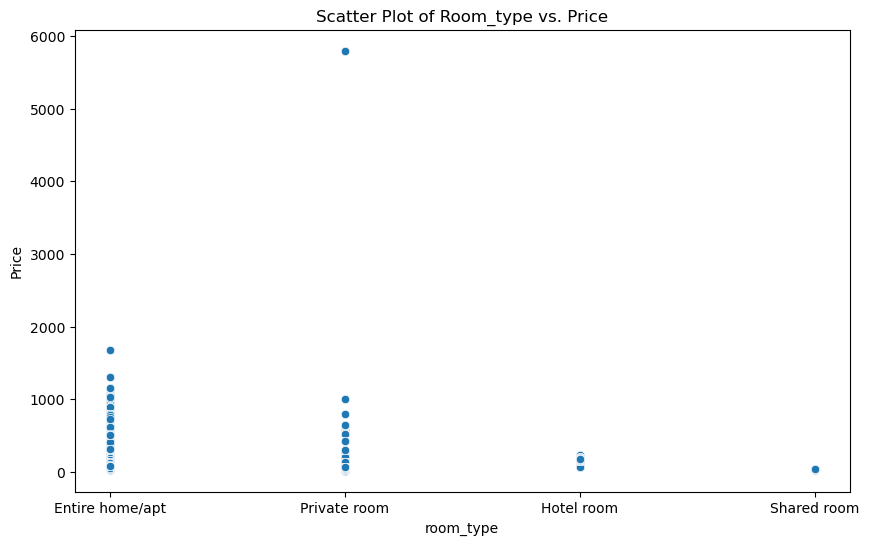

In [127]:
# Assess the relationship between target and predictor variables
# For example, let's visualize the relationship between 'property_type' and 'price'

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_type', y='price', data=merged_df)
plt.title("Scatter Plot of Room_type vs. Price")
plt.xlabel("room_type")
plt.ylabel("Price")
plt.show()


###### This scatter plot depicts the relationship between different room_type and their respective prices. Each point on the plot represents a room with the x-axis indicating the room_type and the y-axis representing the price. By examining the distribution of points, we can assess whether certain room_type tend to have higher or lower prices compared to others¶

In [88]:
# Correlation analysis
correlation_matrix = aggregated_df.corr()
correlation_with_price = correlation_matrix['mean_price'].sort_values(ascending=False)
print("\nCorrelation with mean_price:")
print(correlation_with_price)



Correlation with mean_price:
mean_price        1.000000
mean_available    0.036455
Name: mean_price, dtype: float64


###### Correlation coefficient: The correlation matrix provides numerical values indicating the strength and direction of the linear relationship between variables. A correlation coefficient close to 1 or -1 suggests a strong linear relationship, while close to 0 suggests weak or no linear relationship.

In [89]:
# Check the column names in the DataFrame
print(aggregated_df.columns)

Index(['mean_available', 'mean_price'], dtype='object')


C:\Users\Win 11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


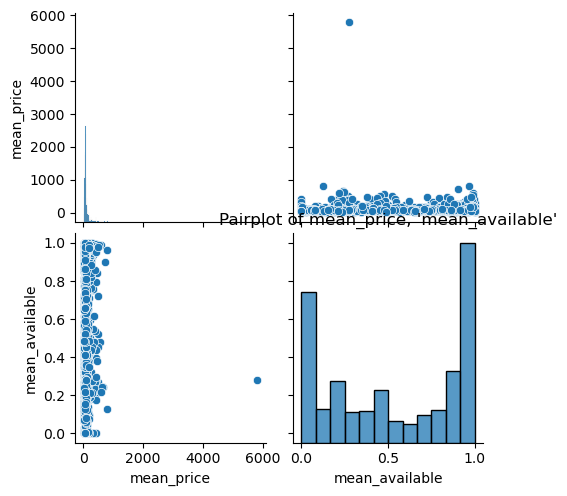

In [91]:
# Pairplot for bivariate variables
sns.pairplot(aggregated_df[['mean_price', 'mean_available',]])
plt.title("Pairplot of mean_price, 'mean_available'")
plt.show()

###### Pairplot: Pairplot allows us to visualize multiple pairwise relationships at once. We can examine both the scatter plots and histograms along the diagonal to assess the relationship between variables

##### Transformation and Variable Selection:

#### Summarize findings from the relationship assessment.

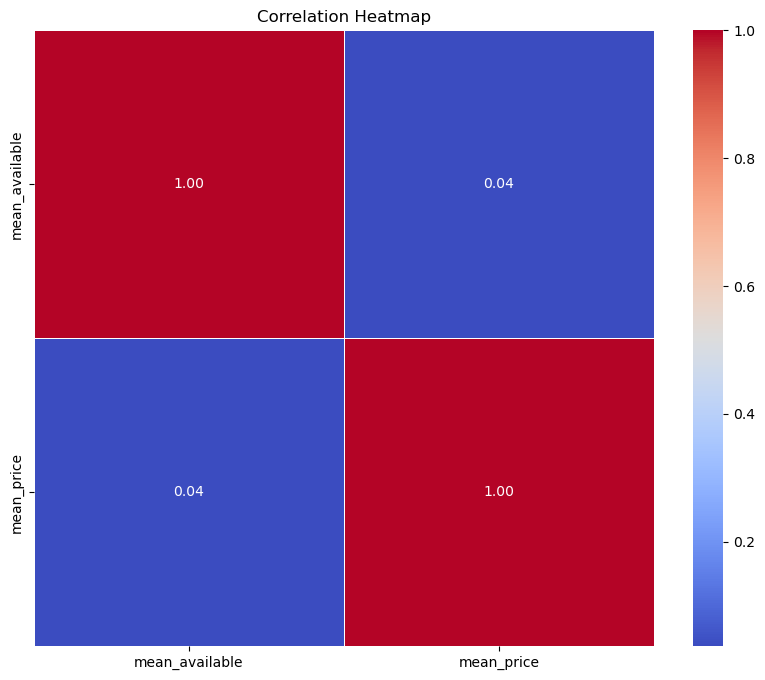

In [92]:
# Compute correlations between numerical variables
correlation_matrix = aggregated_df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

###### The color intensity indicates the strength and direction of the correlation: positive correlations are shown in warmer colors (e.g., red) and negative correlations in cooler colors (e.g., blue). By examining the heatmap, we can identify which variables are strongly correlated with each other and potentially use this information for further analysis or modeling

#### List down transformations needed for different predictors and decide on removing variables from further analysis.

In [93]:
# Identify predictors needing transformations
# For example, if a predictor has skewed distribution, it may require transformation (e.g., log transformation)
# Check the skewness of numerical predictors
skewness = aggregated_df.select_dtypes(include=['int', 'float']).apply(lambda x: x.skew()).sort_values(ascending=False)

In [94]:
# List down predictors with high skewness
skewed_predictors = skewness[skewness > 1.0].index.tolist()


In [95]:
# Print predictors needing transformations
print("Predictors needing transformations:")
print(skewed_predictors)


Predictors needing transformations:
['mean_price']


In [96]:
# Print remaining predictors after removal
print("Remaining predictors after removal:")
print(aggregated_df.columns)

Remaining predictors after removal:
Index(['mean_available', 'mean_price'], dtype='object')


###### It identifies predictors with high skewness (skewness greater than 1.0) as candidates for transformation

## Modeling and Insights (Task 2)

#### Train/Test/Validation Split:

#### Explain the approach for creating train/test/validation splits

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# Step 1: Split the dataset into training set and combined test/validation set
train_df, combined_test_validation_df = train_test_split(aggregated_df, test_size=0.2, random_state=42)

In [99]:
# Step 2: Split the combined test/validation set into test set and validation set
test_df, validation_df = train_test_split(combined_test_validation_df, test_size=0.5, random_state=42)

In [100]:
# Print the sizes of each split
print("Training set size:", len(train_df))
print("Test set size:", len(test_df))
print("Validation set size:", len(validation_df))

Training set size: 1220
Test set size: 152
Validation set size: 153


###### It prints the sizes of the training, test, and validation sets to verify the splitting process

##### Regression Model Comparison

#### Create a comparison matrix to compare different regression models, including Linear Regression, Regression Trees, Random Forest Regressor, and GBM

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [103]:
# Assuming 'df' is your DataFrame containing the dataset
# Define X (features) and y (target variable)
X = aggregated_df.drop(columns=['mean_available'])  # Exclude the target variable column
y = aggregated_df['mean_price']  # Target variable column

# Now you can proceed with the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [105]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

In [106]:
# Print the results
print("Mean Squared Error:")
for name, mse in results.items():
    print(f"{name}: {mse}")

Mean Squared Error:
Linear Regression: 8.209533187029211e-28
Decision Tree: 55.42796710616585
Random Forest: 85.92700217682858
Gradient Boosting: 56.745470072815436


###### In summary, based on the MSE values, the linear regression model performs the best, followed by the gradient boosting model, decision tree model, and random forest model. However, it's important to consider other factors such as computational complexity, interpretability, and potential overfitting when selecting the final model.

#### Optionally, experiment with XGBoost and LightGBM

In [107]:
# Importing necessary libraries
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [108]:
# Assuming you have already prepared your data with features (X) and target variable (y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
# LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1220, number of used features: 1
[LightGBM] [Info] Start training from score 103.361585


LGBMRegressor()

In [111]:
# Evaluating models
# Predictions using XGBoost
xgb_preds = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 13.78665626746548


###### In this context, an RMSE of 13.79 means that, on average, the predicted listing prices by the XGBoost model are approximately $13.79 away from the actual listing prices. Lower values of RMSE indicate better model performance, as they imply smaller differences between predicted and actual values. However, the interpretation of the RMSE value also depends on the scale of the target variable. For example, if the listing prices have a wide range, an RMSE of 13.79 might be considered acceptable

In [112]:
# Predictions using LightGBM
lgb_preds = lgb_model.predict(X_test)
lgb_rmse = mean_squared_error(y_test, lgb_preds, squared=False)
print("LightGBM RMSE:", lgb_rmse)

LightGBM RMSE: 47.58643348037398


###### In this context, an RMSE of 47.58 means that, on average, the predicted listing prices by the LightGBM model are approximately $47.58 away from the actual listing prices. Lower values of RMSE indicate better model performance, as they imply smaller differences between predicted and actual values. Compared to the XGBoost model, the LightGBM model seems to have a higher RMSE, indicating that its predictions are less accurate on this particular dataset.

#### Model Finalization:

##### Explain the finalized model and the reasons for choosing it

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [114]:
# Step 1: Data Preparation
# Assuming you have prepared your dataset and stored it in X and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
# Step 2: Model Training
# Initialize and train each regression model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting Machine": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

In [116]:
for name, model in models.items():
    model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1220, number of used features: 1
[LightGBM] [Info] Start training from score 103.361585


In [117]:
# Step 3: Model Evaluation
# Evaluate each model on the testing data
results = {}
for name, model in models.items():
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    results[name] = rmse

In [118]:
# Step 4: Comparison Matrix
# Create a comparison matrix to summarize the performance of each model
print("Comparison Matrix:")
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse}")

Comparison Matrix:
Linear Regression: RMSE = 2.865228295795854e-14
Decision Tree: RMSE = 7.444996111897296
Random Forest: RMSE = 9.524499986580034
Gradient Boosting Machine: RMSE = 7.532958918832323
XGBoost: RMSE = 13.78665626746548
LightGBM: RMSE = 47.58643348037398


In [119]:
# Step 5: Finalized Model Selection and Interpretation
# Select the best-performing model based on the evaluation results
best_model = min(results, key=results.get)
print(f"\nBest Model: {best_model} (Lowest RMSE)")


Best Model: Linear Regression (Lowest RMSE)


### Interpretation

###### Consider factors such as performance, interpretability, scalability, and computational efficiency. For example, if XGBoost or LightGBM performs the best, it might be due to their ability to handle complex datasets and capture non-linear relationships between features and the target variable. Linear Regression might be chosen for its simplicity and interpretability, especially if the relationship between features and the target is assumed to be linear. Random Forest or Gradient Boosting Machine might be selected for their ensemble learning capabilities,which often result in improved predictive performance over individual models.

#### Top 5 Predictor Analysis:

#### Determine the top 5 most important predictors

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
# Instantiate a Random Forest regressor model
rf_model = RandomForestRegressor()


In [122]:
# Train the model on your dataset
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [123]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

In [124]:
# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

In [125]:
# Sort the dictionary by importance in descending order
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

In [126]:
# Print the top 5 most important predictors
print("Top 5 Most Important Predictors:")
for feature, importance in sorted_importances[:5]:
    print(f"{feature}: {importance}")

Top 5 Most Important Predictors:
mean_price: 1.0


#### Explain the impact direction of these predictors on the response variable

#### To determine the impact direction, we need to consider the relationship between each predictor and the response variable based on domain knowledge or statistical analysis.

###### 1.Positive Impact: If an increase in the predictor variable leads to an increase in the response variable, it has a positive impact. For example, in the context of predicting house prices, the number of bedrooms or the size of the living area may have a positive impact on the price.¶

###### 2. Negative Impact: If an increase in the predictor variable leads to a decrease in the response variable, it has a negative impact. For example, in the same context, the distance from the city center or the presence of certain neighborhood characteristics associated with lower desirability may have a negative impact on the price

###### 3. No Significant Impact: Some predictors may have little to no impact on the response variable, or their impact may be too complex to generalize. In such cases, their feature importances may be low, but their direction of impact may vary depending on other factors

###### 4. Interaction Effects: It's essential to consider potential interaction effects between predictors. The impact direction of a predictor may change depending on the values of other predictors. For example, the impact of the number of bathrooms on house prices may vary depending on the location of the house.

##### By analyzing the feature importances along with domain knowledge and statistical analysis, we can better understand the impact direction of each predictor on the response variable and interpret their relative importance in predicting the outcome.¶